# Linux Transfer Learning notebook - Model Degradation

This notebook aims to show the degradation of accuracy of a model trained on a single version over future versions.

## Creating a  model on 4.13 data

In [1]:
import pandas as pd
df_413 = pd.read_pickle("datasets/dataset_413.pkl")

In [2]:
size_columns = ["GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", "vmlinux", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

In [3]:
from sklearn import ensemble, tree
from sklearn.model_selection import train_test_split

train_size = 0.9
X_train, X_test, y_train, y_test = train_test_split(df_413.drop(columns=size_columns+["cid"], errors="ignore"), df_413["vmlinux"], train_size=train_size)

In [ ]:
reg = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg.fit(X_train, y_train)

In [19]:
y_pred = reg.predict(X_test)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test)/y_test).abs()*100})
error_413 = dfErrorsFold["% error"].mean()
print("MAPE for 4.13 : ", error_413)

MAPE for 4.13 :  4.831610936368557


## Measuring accuracy for future version

### 4.15

In [5]:
df_415 = pd.read_pickle("datasets/dataset_415.pkl")

columns_413 = set(df_413.columns.values)
columns_415 = set(df_415.columns.values)

print("Number of features in 4.13 dataset : ", len(columns_413))
print("Number of features in 4.15 dataset : ", len(columns_415))
print("Number of features common to both datasets : ", len(columns_413.intersection(columns_415)))

print("Number of features that disappear in 4.15 : ", len(columns_413.difference(columns_415)))
print("Number of features that appear in 4.15 : ", len(columns_415.difference(columns_413)))

Number of features in 4.13 dataset :  9488
Number of features in 4.15 dataset :  9445
Number of features common to both datasets :  9146
Number of features that disappear in 4.15 :  342
Number of features that appear in 4.15 :  299


In [6]:
df_415_reduced = df_415[columns_413.intersection(columns_415)]

for c in columns_413.difference(columns_415):
    df_415_reduced = df_415_reduced.assign(**{c:1})
    
df_415_reduced = df_415_reduced[df_413.columns]

X_test_415 = df_415_reduced.drop(columns=size_columns+["cid"], errors="ignore")
y_test_415 = df_415_reduced["vmlinux"]

In [11]:
y_pred = reg.predict(X_test_415)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_415)/y_test_415).abs()*100})
error_415 = dfErrorsFold["% error"].mean()
print("MAPE for 4.15 : ", error_415)

MAPE for 4.15 :  20.014497458885717


### 4.20

In [8]:
df_420 = pd.read_pickle("datasets/dataset_420.pkl")

columns_420 = set(df_420.columns.values)

print("Number of features in 4.13 dataset : ", len(columns_413))
print("Number of features in 4.20 dataset : ", len(columns_420))
print("Number of features common to both datasets : ", len(columns_413.intersection(columns_420)))

print("Number of features that disappear in 4.20 : ", len(columns_413.difference(columns_420)))
print("Number of features that appear in 4.20 : ", len(columns_420.difference(columns_413)))

Number of features in 4.13 dataset :  9488
Number of features in 4.20 dataset :  10208
Number of features common to both datasets :  9019
Number of features that disappear in 4.20 :  469
Number of features that appear in 4.20 :  1189


In [9]:
df_420_reduced = df_420[columns_413.intersection(columns_420)]

for c in columns_413.difference(columns_420):
    df_420_reduced = df_420_reduced.assign(**{c:1})
    
df_420_reduced = df_420_reduced[df_413.columns]

X_test_420 = df_420_reduced.drop(columns=size_columns+["cid"], errors="ignore")
y_test_420 = df_420_reduced["vmlinux"]

In [12]:
y_pred = reg.predict(X_test_420)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_420)/y_test_420).abs()*100})
error_420 = dfErrorsFold["% error"].mean()
print("MAPE for 4.20 : ", error_420)

MAPE for 4.20 :  49.5580688557671


### 5.0

In [13]:
df_500 = pd.read_pickle("datasets/dataset_500.pkl")

columns_500 = set(df_500.columns.values)

print("Number of features in 4.13 dataset : ", len(columns_413))
print("Number of features in 5.0 dataset : ", len(columns_500))
print("Number of features common to both datasets : ", len(columns_413.intersection(columns_500)))

print("Number of features that disappear in 5.0 : ", len(columns_413.difference(columns_500)))
print("Number of features that appear in 5.0 : ", len(columns_500.difference(columns_413)))

Number of features in 4.13 dataset :  9488
Number of features in 5.0 dataset :  10313
Number of features common to both datasets :  8994
Number of features that disappear in 5.0 :  494
Number of features that appear in 5.0 :  1319


In [14]:
df_500_reduced = df_500[columns_413.intersection(columns_500)]

for c in columns_413.difference(columns_500):
    df_500_reduced = df_500_reduced.assign(**{c:1})
    
df_500_reduced = df_500_reduced[df_413.columns]

X_test_500 = df_500_reduced.drop(columns=size_columns+["cid"], errors="ignore")
y_test_500 = df_500_reduced["vmlinux"]

In [15]:
y_pred = reg.predict(X_test_500)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_500)/y_test_500).abs()*100})
error_500 = dfErrorsFold["% error"].mean()
print("MAPE for 5.0 : ", error_500)

MAPE for 5.0 :  21.92124185506205


### 5.07

In [16]:
df_507 = pd.read_pickle("datasets/dataset_507.pkl")

columns_507 = set(df_507.columns.values)

print("Number of features in 4.13 dataset : ", len(columns_413))
print("Number of features in 5.07 dataset : ", len(columns_507))
print("Number of features common to both datasets : ", len(columns_413.intersection(columns_507)))

print("Number of features that disappear in 5.07 : ", len(columns_413.difference(columns_507)))
print("Number of features that appear in 5.07 : ", len(columns_507.difference(columns_413)))

Number of features in 4.13 dataset :  9488
Number of features in 5.07 dataset :  11358
Number of features common to both datasets :  8773
Number of features that disappear in 5.07 :  715
Number of features that appear in 5.07 :  2585


In [17]:
df_507_reduced = df_507[columns_413.intersection(columns_507)]

for c in columns_413.difference(columns_507):
    df_507_reduced = df_507_reduced.assign(**{c:1})
    
df_507_reduced = df_507_reduced[df_413.columns]

X_test_507 = df_507_reduced.drop(columns=size_columns+["cid"], errors="ignore")
y_test_507 = df_507_reduced["vmlinux"]

In [18]:
y_pred = reg.predict(X_test_507)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_507)/y_test_507).abs()*100})
error_507 = dfErrorsFold["% error"].mean()
print("MAPE for 5.07 : ", error_507)

MAPE for 5.07 :  32.34826179272396


## Plotting the results

In [43]:
s = pd.Series([error_413, error_415, error_420, error_500, error_507], index = ["4.13", "4.15", "4.20", "5.0", "5.07"])

Text(3.85, 34.34826179272396, '32.35%')

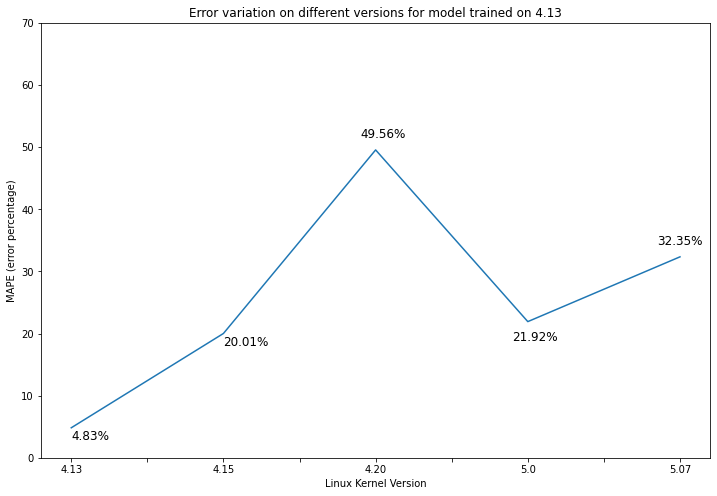

In [44]:
ax = s.plot(figsize=(12,8), ylim=(0, 70))

ax.set_ylabel("MAPE (error percentage)")
ax.set_xlabel("Linux Kernel Version")
ax.set_title("Error variation on different versions for model trained on 4.13")

ax.text(0, error_413-2, "{:.2f}%".format(error_413), fontsize=12)
ax.text(1, error_415-2, "{:.2f}%".format(error_415), fontsize=12)
ax.text(1.9, error_420+2, "{:.2f}%".format(error_420), fontsize=12)
ax.text(2.9, error_500-3, "{:.2f}%".format(error_500), fontsize=12)
ax.text(3.85, error_507+2, "{:.2f}%".format(error_507), fontsize=12)

## Exporting the model

In [42]:
from joblib import dump
dump(reg, 'gbt_413.joblib')

['gbt_413.joblib']